# DATA Program - Capstone Project Brainstorming
---
## Background / About Me / Personal Relevance
* I come from a family of nurses.  My mom spent her entire career working bedside as a night shift RN, working at a nursing home for the first part of her career, then at a larger hospital system for the latter part of her career.

* Growing up, I didn't really understand what my mom's job entailed.  I just remember that most mornings, she'd come home completely wiped out.

* After graduating college, I thought that I wanted to pursue a career in medicine.  In order to gain some bedside experience (and, in part, to understand what my mom and other family members did for a living), I worked as a night shift CNA (nurse aide) at a private hospital that was recently acquired by a larger hospital network.

* Working at this hospital was a transformative experience, and really made me sensitive to how factors like staffing and cultural competence (especially in areas with diverse patient populations) can affect quality of care.
---
## Project Goals / Questions
* New York City is one of the most diverse and populous cities in the U.S.

* I'm most interested in understanding:<br>
<br>**1. Where are there shortages in the NYC healthcare workforce?**<br>
<br>**2. What is the sociodemographic makeup of communities designated as healthcare professional shortage areas (HSPAs)?**

---
## Data Source(s)
* The Health Resources and Services Administration (HRSA) is a federal agency dedicated to improving access to health care services for the nation's highest-need communities.

* The HRSA recruits doctors, nurses, dentists and others to work in areas with too few healthcare professionals, collecting data to monitor trends in the healthcare workforce in order to forecast future demand.

* Federal regulations stipulate that, in order to be considered as having a shortage of providers, an area must have a population-to-provider ratio of a certain threshold. For primary medical care, the population to provider ratio must be at least 3,500 to 1 (3,000 to 1 if there are unusually high needs in the community).

* Datasets from the HRSA that I will be using:
    * **Health Professional Shortage Areas (HPSA) - Primary Care (https://data.hrsa.gov/data/download)**
    * (??) Medically Underserved Areas / Populations (https://data.hrsa.gov/data/download)
    * (??) Area Health Resource Files (AHRF) Diversity Dashboard (https://data.hrsa.gov/data/download)
    * (??) Workforce Projections (https://data.hrsa.gov/data/download)
---
## Methods
* Dimensions:
    * `Common State County FIPS Code` & `County Equivalent Name` (5 counties that encapsulate the 5 boroughs)
    * `HPSA Component Name` (4557 census tracts)
    * `HPSA Status` (Withdrawn, Designated, Proposed for Withdrawal)
    * `HPSA Name` (25 neighborhoods)
    * `HPSA Designation Date` (14 dates, ranging from Dec. 2016 - Aug. 2023)
<br><br>
* Measures:
    * `HPSA Score` (0 - 26)
    * `HPSA FTE` (number of Primary Care practitioners providing ambulatory patient care)
    * `HPSA Designation Population` (number of persons affected by the HPSA)
    * `HPSA Provider Ratio Goal` (target population-to-provider ratio)
    * `HPSA Formal Ratio` (actual population-to-provider ratio)
    * `HPSA Shortage` (number of FTE needed to reach target population-to-provider ratio)
    * `% of Population Below 100% Poverty` (% of population living below the US Federal Poverty Level)
    * `HPSA Estimated Served Population` (estimated total population served by the FTE healthcare practitioners)
    * `HPSA Estimated Underserved Population` (estimated underserved population served by the FTE healthcare practitioners)
---
## Exploratory Data Analysis

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# Import data
hpsa = pd.read_excel('raw_data/BCD_HPSA_FCT_DET_PC.xlsx')

# Subset data to only rows for NY state
ny_hpsa = hpsa[hpsa['Primary State Abbreviation'] == 'NY']

In [3]:
''' FIPS Codes
Kings County / Brooklyn - 36047
Queens County / Queens - 36081
Bronx County / Bronx - 36005
New York County / Manhattan - 36061
Richmond County / Staten Island - 36085
'''

# Get rows only from the five boroughs of New York
counties = ['36047', '36081', '36005', '36061', '36085']
nyc = ny_hpsa[ny_hpsa['Common State County FIPS Code'].isin(counties)]

In [4]:
# Get sample size for HPSA Component Type Description
nyc['HPSA Component Type Description'].value_counts()

Census Tract    4557
Unknown           64
Name: HPSA Component Type Description, dtype: int64

In [5]:
# Create two dataframes: one for census tract data (nyc_census), one for other/unknown (nyc_other)
nyc_census = nyc[nyc['HPSA Component Type Description'] == 'Census Tract']
nyc_other = nyc[nyc['HPSA Component Type Description'] == 'Unknown']

print(f'nyc_census: {nyc_census.shape}\nnyc_other: {nyc_other.shape}')

nyc_census: (4557, 65)
nyc_other: (64, 65)


In [6]:
# Who are these 64 "other" rows?
nyc_other['HPSA Name'].unique()

array(['CHARLES B. WANG COMMUNITY HEALTH CENTER, INC.',
       'ODA PRIMARY HEALTH CARE CENTER, INC.', 'Soundview Health Center',
       'Brooklyn Plaza Medical Center', 'MONTEFIORE MEDICAL CENTER',
       'HERITAGE HEALTH AND HOUSING, INC.', 'Care For The Homeless',
       'URBAN HEALTH PLAN, INC.', 'FLOATING HOSPITAL INCORPORATED (THE)',
       'SETTLEMENT HEALTH AND MEDICAL SERVICES, INC.',
       'Bowery Residents Community',
       'East Harlem Council For Human Services, Inc.',
       'Sunset Park Health Council, Inc.',
       'COMMUNITY HEALTH CENTER OF RICHMOND, INC.',
       'Ahrc Health Care Inc.', 'Community Health Center of Richmond',
       'BEACON CHRISTIAN COMMUNITY HEALTH CENTER',
       'Harlem United Community AIDS Center',
       'Union Community Health Center, Inc.',
       'Damian Family Care Centers, Inc.',
       'Bronx Community Health Network, Inc',
       'BRONXCARE HEALTH INTEGRATED SERVICES SYSTEM, INC.',
       'THE ADDABBO JOSEPH P FAMILY HEALTH CENTER INC

## Focusing on NYC Census Tracts

In [7]:
# Get sample size for County Equivalent Name
nyc_census['County Equivalent Name'].value_counts()

Kings       2055
Bronx       1078
Queens       816
New York     492
Richmond     116
Name: County Equivalent Name, dtype: int64

In [8]:
# For NYC census tracts, get sample size by HPSA status
nyc_census['HPSA Status'].value_counts()

Withdrawn                  2528
Designated                 1475
Proposed For Withdrawal     554
Name: HPSA Status, dtype: int64

In [9]:
# Only get rows that have an HPSA Status of Designated
nyc_census_designated = nyc_census[nyc_census['HPSA Status'] == 'Designated']

nyc_census_designated.shape

(1475, 65)

In [10]:
# Get sample size for County Equivalent Name for only designated HPSAs
nyc_census_designated['County Equivalent Name'].value_counts()

Kings       608
Queens      398
Bronx       338
New York    100
Richmond     31
Name: County Equivalent Name, dtype: int64

In [11]:
# Group by county
county_census = nyc_census_designated.groupby('County Equivalent Name')

In [12]:
# Get descriptive statistics for HPSA Score (0 - 26, higher the score, greater the priority)
county_census['HPSA Score'].describe()

,count,mean,std,min,25%,50%,75%,max
County Equivalent Name,,,,,,,,
Bronx,338.0,17.597633,1.035395,16.0,17.0,18.0,18.0,19.0
Kings,608.0,15.796053,2.088925,9.0,15.0,16.0,17.0,18.0
New York,100.0,14.590000,0.514340,14.0,14.0,15.0,15.0,16.0
Queens,398.0,15.143216,1.341863,14.0,14.0,14.0,16.0,18.0
Richmond,31.0,18.000000,0.000000,18.0,18.0,18.0,18.0,18.0


<Axes: xlabel='County Equivalent Name', ylabel='HPSA Score'>

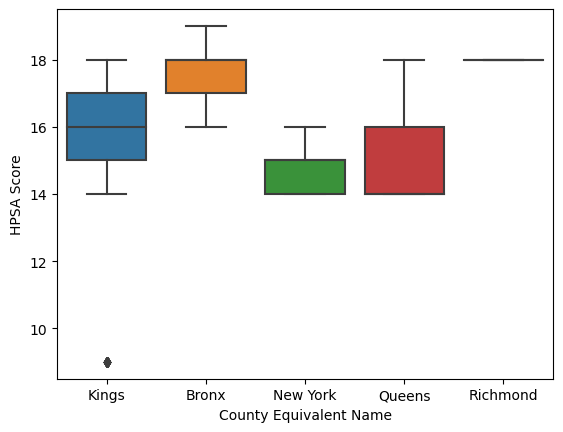

In [13]:
# Create boxplot of HPSA Score for census tracts with Designated status
sns.boxplot(nyc_census_designated, x = 'County Equivalent Name', y = 'HPSA Score')

<Axes: xlabel='HPSA Score', ylabel='Count'>

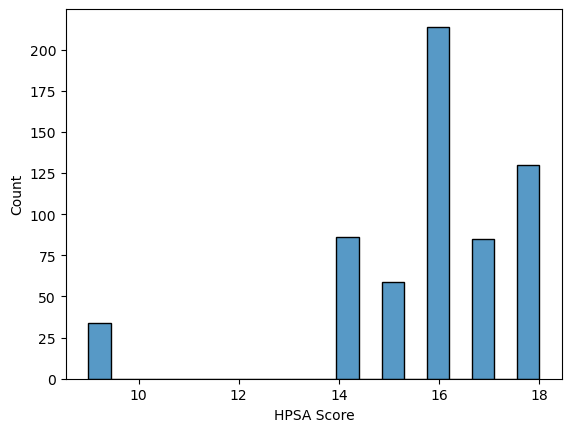

In [14]:
# Create histogram of HPSA Score for Kings County (Brooklyn) census tracts with Designated status
sns.histplot(nyc_census_designated[nyc_census_designated['County Equivalent Name'] == 'Kings'], x = 'HPSA Score')

<Axes: xlabel='HPSA Score', ylabel='Count'>

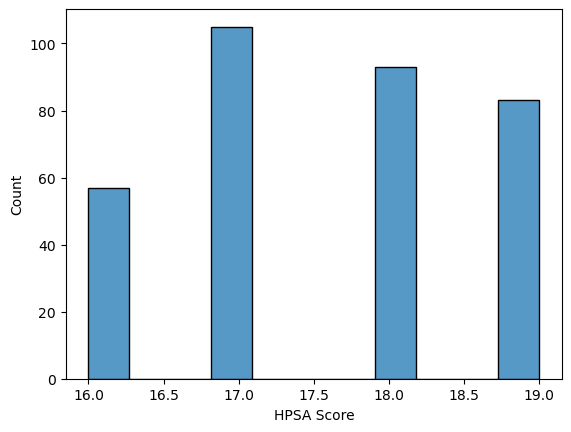

In [15]:
# Create histogram of HPSA Score for Bronx County census tracts with Designated status
sns.histplot(nyc_census_designated[nyc_census_designated['County Equivalent Name'] == 'Bronx'], x = 'HPSA Score')

<Axes: xlabel='HPSA Score', ylabel='Count'>

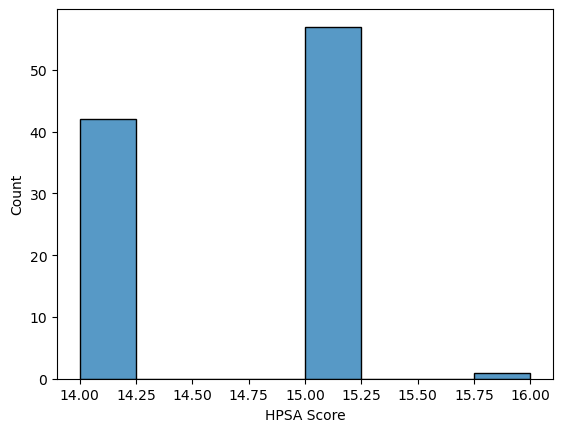

In [16]:
# Create histogram of HPSA Score for New York County (Manhattan) census tracts with Designated status
sns.histplot(nyc_census_designated[nyc_census_designated['County Equivalent Name'] == 'New York'], x = 'HPSA Score')

<Axes: xlabel='HPSA Score', ylabel='Count'>

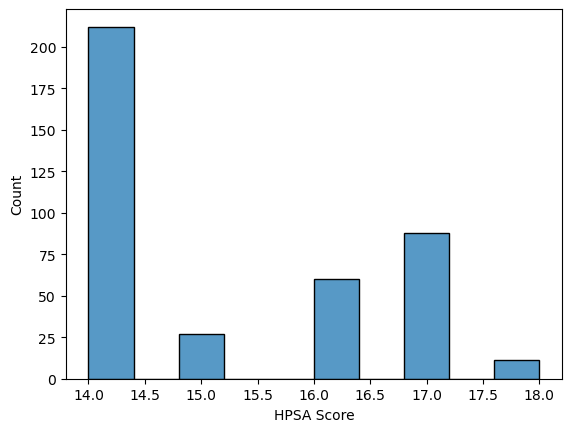

In [17]:
# Create histogram of HPSA Score for Queens County census tracts with Designated status
sns.histplot(nyc_census_designated[nyc_census_designated['County Equivalent Name'] == 'Queens'], x = 'HPSA Score')

<Axes: xlabel='HPSA Score', ylabel='Count'>

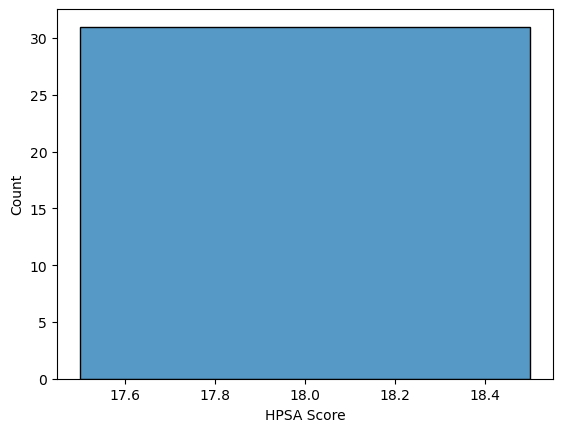

In [18]:
# Create histogram of HPSA Score for Richmond County (Staten Island) census tracts with Designated status
sns.histplot(nyc_census_designated[nyc_census_designated['County Equivalent Name'] == 'Richmond'], x = 'HPSA Score')

In [19]:
# Get descriptive statistics for HPSA FTE - number of Primary Care practitioners providing ambulatory patient care
county_census['HPSA FTE'].describe()

,count,mean,std,min,25%,50%,75%,max
County Equivalent Name,,,,,,,,
Bronx,338.0,14.901572,7.679628e+00,3.5870,11.1592,14.9692,16.3868,28.0352
Kings,608.0,16.713330,8.478021e+00,4.1228,7.7448,18.6614,22.7200,35.6200
New York,100.0,11.058580,4.748576e+00,3.5870,5.9854,9.2490,16.4120,16.4120
Queens,398.0,15.881458,8.872893e+00,5.1802,6.6400,22.7702,25.5230,25.5230
Richmond,31.0,3.161600,2.708580e-15,3.1616,3.1616,3.1616,3.1616,3.1616


<Axes: xlabel='County Equivalent Name', ylabel='HPSA FTE'>

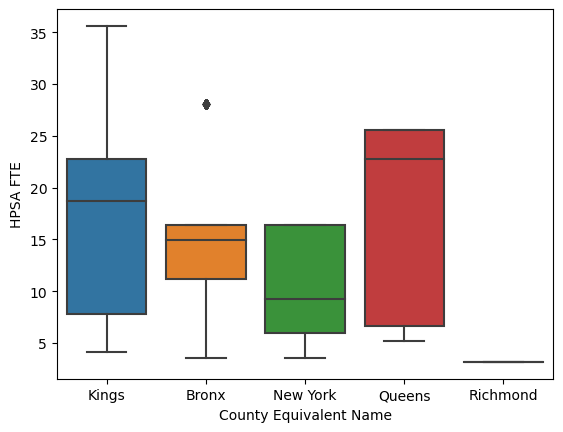

In [20]:
# Create boxplot of number of Primary Care practitioners (HPSA FTE) for census tracts with Designated status
sns.boxplot(nyc_census_designated, x = 'County Equivalent Name', y = 'HPSA FTE')

In [21]:
# Get descriptive statistics for % of Population Below 100% Poverty
county_census['% of Population Below 100% Poverty'].describe()

,count,mean,std,min,25%,50%,75%,max
County Equivalent Name,,,,,,,,
Bronx,338.0,27.488166,8.826987e+00,15.7,21.6,27.6,36.800,38.2
Kings,608.0,22.534868,4.204160e+00,16.1,18.3,22.2,23.525,36.3
New York,100.0,24.691000,4.893122e+00,16.6,20.7,24.3,24.300,33.3
Queens,398.0,14.269095,2.443255e+00,12.0,12.0,14.0,16.100,23.6
Richmond,31.0,21.800000,7.222880e-15,21.8,21.8,21.8,21.800,21.8


<Axes: xlabel='County Equivalent Name', ylabel='% of Population Below 100% Poverty'>

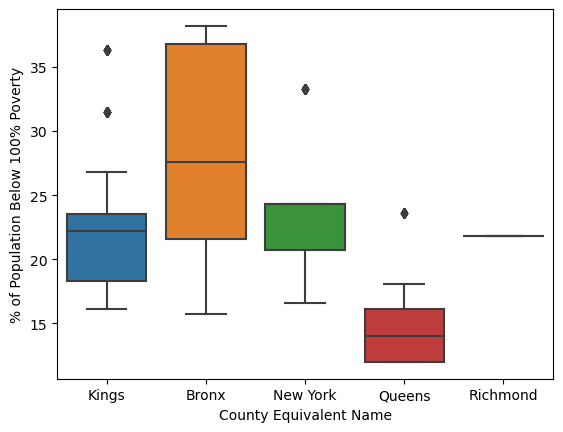

In [22]:
# Create boxplot of % of Population Below 100% Poverty for census tracts with Designated status
sns.boxplot(nyc_census_designated, x = 'County Equivalent Name', y = '% of Population Below 100% Poverty')

In [23]:
# Get descriptive statistics for HPSA Designation Population - number of persons affected by the healthcare provider shortage
county_census['HPSA Designation Population'].describe()

,count,mean,std,min,25%,50%,75%,max
County Equivalent Name,,,,,,,,
Bronx,338.0,140263.254438,47129.851266,33577.0,109639.0,157635.0,159815.0,207002.0
Kings,608.0,157490.305921,47810.080681,56163.0,122126.0,158990.0,187818.0,235361.0
New York,100.0,95289.500000,29311.624829,33577.0,75739.0,75739.0,128953.0,128953.0
Queens,398.0,152943.296482,60400.162998,58611.0,144858.0,144858.0,230739.0,230739.0
Richmond,31.0,55408.000000,0.000000,55408.0,55408.0,55408.0,55408.0,55408.0


<Axes: xlabel='County Equivalent Name', ylabel='HPSA Designation Population'>

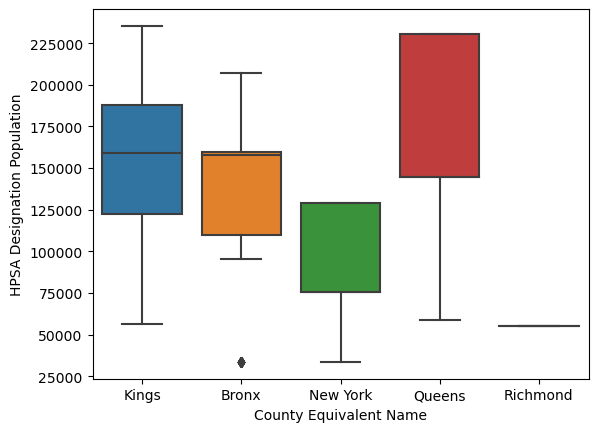

In [24]:
# Create boxplot of number of persons affected by HPSA for census tracts with Designated status
sns.boxplot(nyc_census_designated, x = 'County Equivalent Name', y = 'HPSA Designation Population')

In [25]:
# Get descriptive statistics for HPSA Shortage - number of FTE needed to reach target population-to-provider ratio
county_census['HPSA Shortage'].describe()

,count,mean,std,min,25%,50%,75%,max
County Equivalent Name,,,,,,,,
Bronx,338.0,31.851031,1.000272e+01,7.6030,24.6678,38.3008,40.9648,41.3808
Kings,608.0,35.783529,1.303680e+01,5.6500,28.1686,38.3238,40.4974,55.7300
New York,100.0,20.703220,5.693090e+00,7.6030,19.2646,19.2646,26.5680,26.5680
Queens,398.0,35.099346,1.658879e+01,10.7678,22.7670,22.7670,54.1398,54.1398
Richmond,31.0,15.308400,3.611440e-15,15.3084,15.3084,15.3084,15.3084,15.3084


<Axes: xlabel='County Equivalent Name', ylabel='HPSA Shortage'>

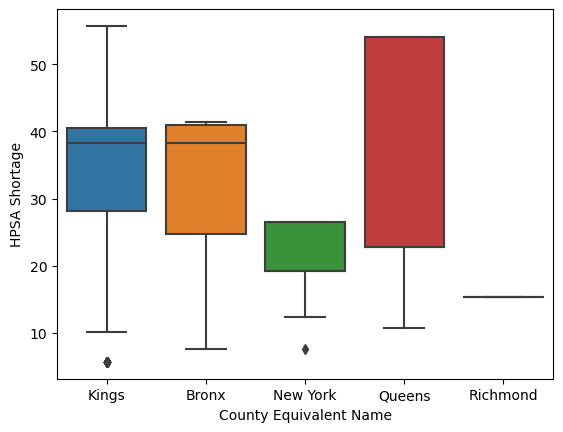

In [26]:
# Create boxplot of number of FTE needed to reach target population-to-provider ratio for census tracts with Designated status
sns.boxplot(nyc_census_designated, x = 'County Equivalent Name', y = 'HPSA Shortage')

<Axes: xlabel='County Equivalent Name', ylabel='HPSA Estimated Underserved Population'>

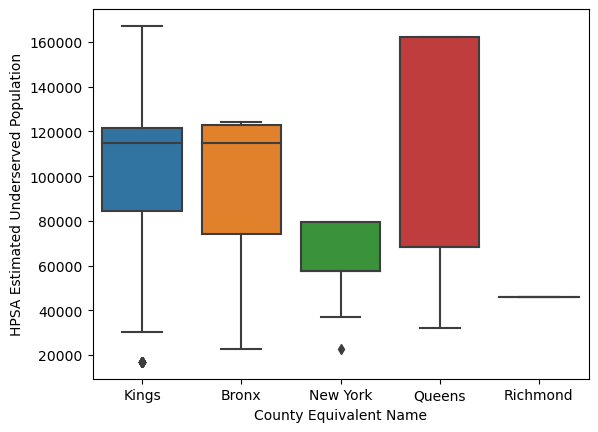

In [27]:
# Create boxplot of estimated underserved population served by FTEs for census tracts with Designated status
sns.boxplot(nyc_census_designated, x = 'County Equivalent Name', y = 'HPSA Estimated Underserved Population')

<Axes: xlabel='County Equivalent Name', ylabel='HPSA Estimated Served Population'>

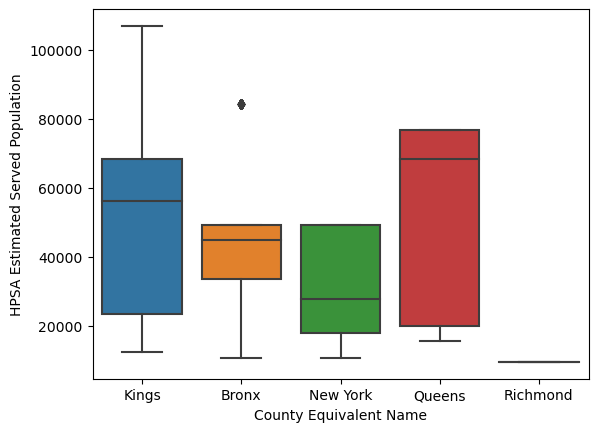

In [28]:
# Create boxplot of estimated total population served by FTEs for census tracts with Designated status
sns.boxplot(nyc_census_designated, x = 'County Equivalent Name', y = 'HPSA Estimated Served Population')

## Focusing on NYC "Other"
### (non-geographic, non-population HPSAs; i.e. actual facilities)

In [29]:
# Get sample size for County Equivalent Name
nyc_other['County Equivalent Name'].value_counts()

New York    28
Kings       13
Bronx       13
Queens       6
Richmond     4
Name: County Equivalent Name, dtype: int64

In [30]:
nyc_other['HPSA Status'].value_counts()

Designated                 43
Withdrawn                  19
Proposed For Withdrawal     2
Name: HPSA Status, dtype: int64

In [31]:
# Only get rows that have an HPSA Status of Designated
nyc_other_designated = nyc_other[nyc_other['HPSA Status'] == 'Designated']

nyc_other_designated.shape

(43, 65)

In [32]:
# Get sample size for County Equivalent Name for only designated HPSAs
nyc_other_designated['County Equivalent Name'].value_counts()

New York    17
Kings       11
Bronx        8
Queens       4
Richmond     3
Name: County Equivalent Name, dtype: int64

In [33]:
# Group by county
county_other = nyc_other_designated.groupby('County Equivalent Name')

In [34]:
# Get descriptive statistics for HPSA Score (0 - 26, higher the score, greater the priority)
county_other['HPSA Score'].describe()

,count,mean,std,min,25%,50%,75%,max
County Equivalent Name,,,,,,,,
Bronx,8.0,19.000000,0.000000,19.0,19.0,19.0,19.0,19.0
Kings,11.0,18.000000,2.683282,12.0,17.5,18.0,20.0,21.0
New York,17.0,17.352941,1.902011,12.0,17.0,18.0,18.0,20.0
Queens,4.0,18.500000,0.577350,18.0,18.0,18.5,19.0,19.0
Richmond,3.0,15.000000,1.732051,13.0,14.5,16.0,16.0,16.0


<Axes: xlabel='County Equivalent Name', ylabel='HPSA Score'>

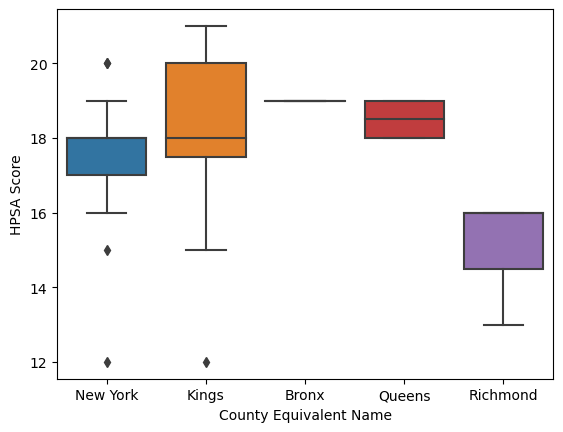

In [35]:
# Create boxplot of HPSA Score for facilities with Designated status
sns.boxplot(nyc_other_designated, x = 'County Equivalent Name', y = 'HPSA Score')

In [36]:
# Get descriptive statistics for HPSA Designation Population - number of persons affected by the healthcare provider shortage
county_other['HPSA Designation Population'].describe()

,count,mean,std,min,25%,50%,75%,max
County Equivalent Name,,,,,,,,
Bronx,8.0,407006.125000,52964.473002,322596.0,389575.75,400790.5,425956.75,501402.0
Kings,11.0,327967.818182,331383.561282,1687.0,124226.00,193076.0,465482.50,1034161.0
New York,15.0,624115.733333,479120.462838,1620.0,281819.00,553236.0,968450.50,1549440.0
Queens,4.0,374475.500000,331819.617291,65647.0,98644.00,379795.5,655627.00,672664.0
Richmond,3.0,435350.666667,682276.853451,34488.0,41458.50,48429.0,635782.00,1223135.0


<Axes: xlabel='County Equivalent Name', ylabel='HPSA Designation Population'>

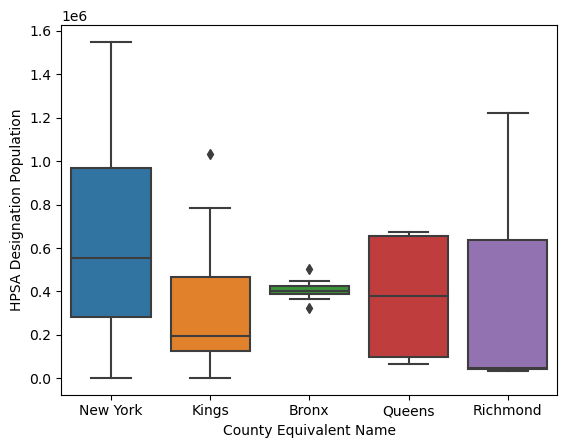

In [37]:
# Create boxplot of number of persons affected by the healthcare provider shortage for facilities with Designated status
sns.boxplot(nyc_other_designated, x = 'County Equivalent Name', y = 'HPSA Designation Population')